In [1]:
###############################################
# Download & Extract the ZIP File
###############################################

import pandas as pd
import requests
import zipfile
import io

# "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"
# The above link contains the zip file for the folder containing the dataset.
# Donwload the dataset and Load it (it's inside the extracted folder).

df = pd.read_csv(
    "/kaggle/input/sms-spam-collection-dataset/SMSSpamCollection", sep="\t", header=None, names=["label", "text"]
)

# Display first few rows
print(df.head())

  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [2]:

###############################################
# Check Dataset Overview
###############################################

# Check dataset size and structure
print(df.shape)  # Rows & Columns
print("*******")
print(df.info())  # Data types & Missing values


(5572, 2)
*******
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


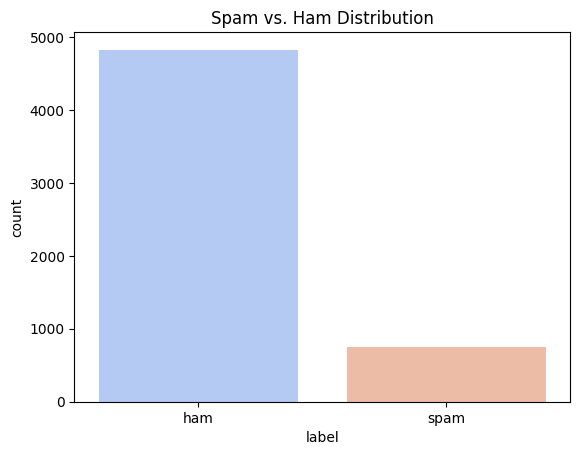

label
ham     4825
spam     747
Name: count, dtype: int64


In [3]:

###############################################
# Check Class Distribution (Spam vs. Ham)
###############################################
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot of spam vs ham messages
sns.countplot(x=df["label"], palette="coolwarm")
plt.title("Spam vs. Ham Distribution")
plt.show()

# Print counts
print(df["label"].value_counts())



In [4]:

###############################################
# Checking for Duplicate Messages/Rows
###############################################

print("Duplicate messages:", df.duplicated().sum())

# Remove duplicates if necessary
df = df.drop_duplicates()
print("After removing duplicates:", df.shape)

Duplicate messages: 403
After removing duplicates: (5169, 2)


In [5]:

###############################################
# Checking for Missing Rows
###############################################

print("Missing values:\n", df.isnull().sum())

Missing values:
 label    0
text     0
dtype: int64


In [6]:

###############################################
# Convert Labels to Numeric (Machine learning models require numerical labels.)
###############################################

df["label"] = df["label"].map({"ham": 0, "spam": 1})
df["label"] 


0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5169, dtype: int64

In [7]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

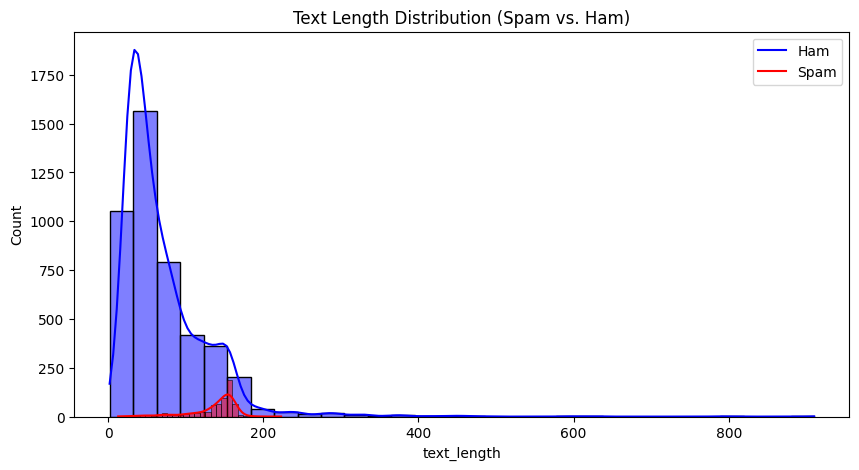

In [8]:

###############################################
# Check Text Length Distribution
###############################################

df["text_length"] = df["text"].apply(len)

# Histogram of text length distribution

plt.figure(figsize=(10, 5))
sns.histplot(
    df[df["label"] == 0]["text_length"], bins=30, kde=True, color="blue"
)
sns.histplot(
    df[df["label"] == 1]["text_length"], bins=30, kde=True, color="red"
)
plt.legend(labels=["Ham", "Spam"])  # Explicitly provide the labels
plt.title("Text Length Distribution (Spam vs. Ham)")
plt.show()



In [9]:

###############################################
#  Most Common Words in Spam vs. Ham
###############################################

from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))


# Function to get common words
def get_most_common_words(texts, n=20):
    words = (
        " ".join(texts)
        .lower()
        .translate(str.maketrans("", "", string.punctuation))
        .split()
    )
    words = [word for word in words if word not in stop_words]
    return Counter(words).most_common(n)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:

# Get common words for ham and spam
ham_words = get_most_common_words(df[df["label"] == 0]["text"])
spam_words = get_most_common_words(df[df["label"] == 1]["text"])

print("Most common words in HAM messages:", ham_words)
print("Most common words in SPAM messages:", spam_words)

Most common words in HAM messages: [('u', 891), ('im', 436), ('get', 295), ('2', 292), ('ltgt', 254), ('dont', 248), ('ok', 247), ('go', 242), ('got', 226), ('like', 221), ('know', 221), ('come', 211), ('ill', 207), ('good', 207), ('ur', 202), ('call', 186), ('time', 181), ('love', 173), ('ü', 169), ('day', 169)]
Most common words in SPAM messages: [('call', 303), ('free', 188), ('2', 155), ('txt', 126), ('u', 123), ('ur', 119), ('mobile', 105), ('stop', 105), ('text', 103), ('4', 97), ('claim', 96), ('reply', 93), ('prize', 81), ('get', 69), ('new', 64), ('send', 58), ('urgent', 58), ('nokia', 54), ('cash', 51), ('contact', 51)]


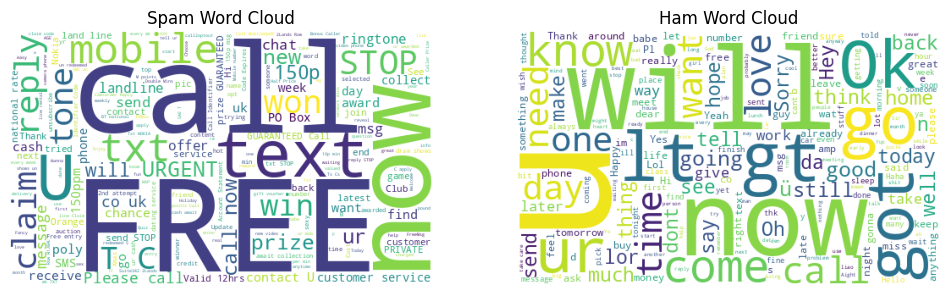

In [11]:

###############################################
# Word Cloud for Spam and Ham Messages
###############################################

from wordcloud import WordCloud

# Generate word clouds
spam_text = " ".join(df[df["label"] == 1]["text"])
ham_text = " ".join(df[df["label"] == 0]["text"])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(
    WordCloud(width=500, height=300, background_color="white").generate(spam_text)
)
plt.axis("off")
plt.title("Spam Word Cloud")

plt.subplot(1, 2, 2)
plt.imshow(
    WordCloud(width=500, height=300, background_color="white").generate(ham_text)
)
plt.axis("off")
plt.title("Ham Word Cloud")

plt.show()


In [12]:

###############################################
# Text Preprocessing and Vectorization
###############################################

"""

Before training the model, we need to:

1. Convert text data into numerical format using TF-IDF Vectorization.
2. Split the dataset into training and testing sets.

"""

from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text data to numerical representation using TF-IDF
vectorizer = TfidfVectorizer(
    stop_words="english", max_features=5000
)  # Use top 5000 words
X = vectorizer.fit_transform(df["text"])  # Transform text into TF-IDF features
y = df["label"]  # Target variable (spam=1, ham=0)


In [13]:
print(X)

  (0, 4641)	0.225270839387401
  (0, 1498)	0.18835603396068373
  (0, 815)	0.3396302452751845
  (0, 674)	0.3842174447890514
  (0, 1847)	0.3396302452751845
  (0, 4843)	0.2843345239792958
  (0, 1511)	0.22481396442317514
  (0, 675)	0.3396302452751845
  (0, 486)	0.3053647769102427
  (0, 948)	0.31105452770992265
  (0, 2713)	0.31419085232154853
  (1, 2337)	0.5465400846779284
  (1, 4749)	0.43047629316889785
  (1, 1787)	0.5233829050336306
  (1, 1860)	0.40695592825705884
  (1, 2311)	0.2764802055026741
  (2, 431)	0.17355991927705575
  (2, 2975)	0.17355991927705575
  (2, 4312)	0.1288396210187293
  (2, 3837)	0.20852528327605138
  (2, 2923)	0.18438268725388185
  (2, 3015)	0.17071910338063762
  (2, 276)	0.23590081457357054
  (2, 4090)	0.12526368446370373
  (2, 122)	0.23590081457357054
  :	:
  (5164, 4274)	0.2743771187826859
  (5164, 151)	0.2656782787779259
  (5164, 2223)	0.27842551050505093
  (5164, 4818)	0.21901366325979754
  (5164, 819)	0.21314559451943943
  (5164, 2858)	0.22285281335932627
  (5164,

In [14]:

###############################################
# Split Data for Training & Testing
###############################################

from sklearn.model_selection import train_test_split

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (4135, 5000)
Testing set size: (1034, 5000)


In [15]:

###############################################
# Check Class Distribution After Splitting
###############################################

# Check distribution in training and testing sets
train_distribution = y_train.value_counts(normalize=True) * 100  # Percentage format
test_distribution = y_test.value_counts(normalize=True) * 100  # Percentage format

print("Class distribution in Training Set:")
print(train_distribution)

print("\nClass distribution in Testing Set:")
print(test_distribution)

Class distribution in Training Set:
label
0    87.593712
1    12.406288
Name: proportion, dtype: float64

Class distribution in Testing Set:
label
0    86.460348
1    13.539652
Name: proportion, dtype: float64


In [16]:


###############################################
# Apply SMOTE for Oversampling
###############################################

"""

SMOTE generates synthetic samples for the minority class (spam), making the dataset balanced.
sampling_strategy='auto' balances both classes equally.
It is only applied to the training set to prevent data leakage.

"""

from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(sampling_strategy="auto", random_state=42)

# Apply SMOTE only on training data (to avoid data leakage)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("Class distribution after SMOTE:")
print(y_train_resampled.value_counts(normalize=True) * 100)

Class distribution after SMOTE:
label
0    50.0
1    50.0
Name: proportion, dtype: float64


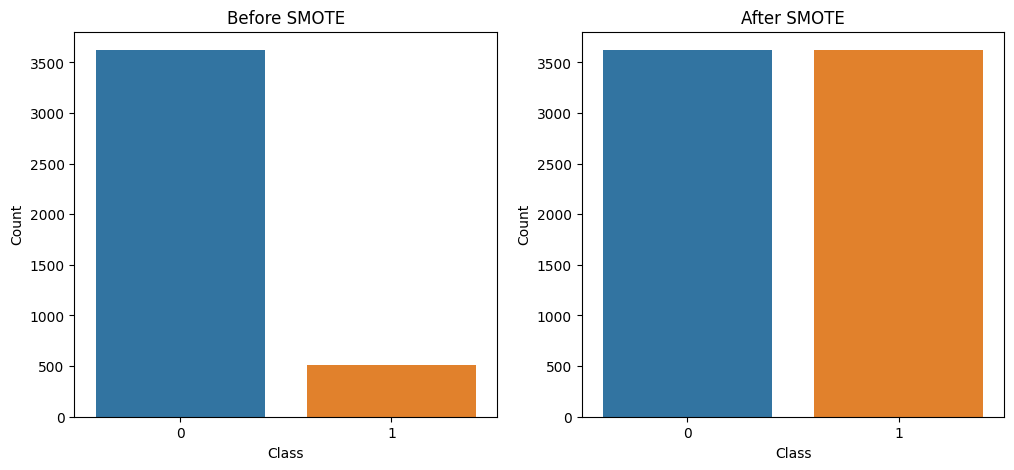

In [17]:

###############################################
# Verify Class Distribution
###############################################

import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution before and after SMOTE
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Before SMOTE
sns.barplot(x=y_train.value_counts().index, y=y_train.value_counts(), ax=ax[0])
ax[0].set_title("Before SMOTE")
ax[0].set_xlabel("Class")
ax[0].set_ylabel("Count")

# After SMOTE
sns.barplot(
    x=y_train_resampled.value_counts().index,
    y=y_train_resampled.value_counts(),
    ax=ax[1],
)
ax[1].set_title("After SMOTE")
ax[1].set_xlabel("Class")
ax[1].set_ylabel("Count")

plt.show()

In [18]:

###############################################
# Train Logistic Regression Model on Balanced Data
###############################################

from sklearn.linear_model import LogisticRegression

# Train logistic regression model on the balanced dataset
model_smote = LogisticRegression()
model_smote.fit(X_train_resampled, y_train_resampled)

# Predict on the original test set
y_pred_smote = model_smote.predict(X_test)

In [31]:

###############################################
# Improve Model Performance
# Hyperparameter Tuning
###############################################

from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {"C": np.logspace(-3, 2, 10)}

# Use GridSearchCV for best parameter selection
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring="f1")
grid_search.fit(X_train_resampled, y_train_resampled)

# Best model
best_model = grid_search.best_estimator_
print(f"Best Regularization Parameter: {grid_search.best_params_['C']}")


Best Regularization Parameter: 100.0


Classification Report after SMOTE:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       894
           1       0.90      0.91      0.90       140

    accuracy                           0.97      1034
   macro avg       0.94      0.95      0.94      1034
weighted avg       0.97      0.97      0.97      1034



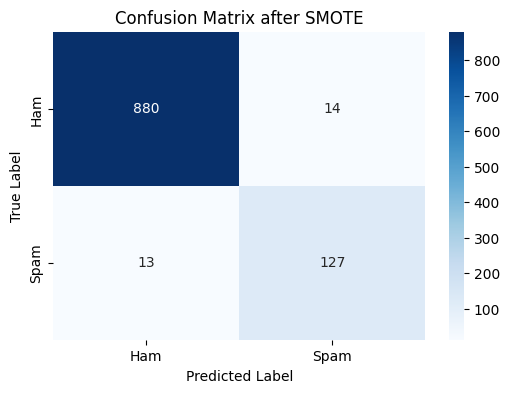

In [42]:

###############################################
# Evaluate the Model
###############################################

from sklearn.metrics import classification_report, confusion_matrix

# Print evaluation metrics
print("Classification Report after SMOTE:")
print(classification_report(y_test, y_pred_smote))

# Confusion matrix
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)

# Visualizing confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(
    conf_matrix_smote,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Ham", "Spam"],
    yticklabels=["Ham", "Spam"],
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix after SMOTE")
plt.show()


Classification Report (Best Model after Hyperparameter Tuning):
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       894
           1       0.85      0.96      0.90       140

    accuracy                           0.97      1034
   macro avg       0.92      0.97      0.94      1034
weighted avg       0.97      0.97      0.97      1034



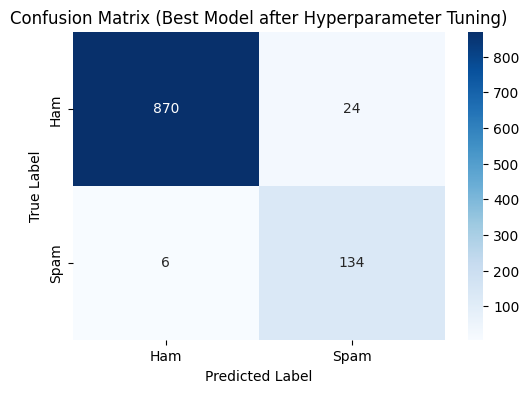

In [43]:

###############################################
# Evaluate the Best Model (After Hyperparameter Tuning)
###############################################

# Predict on the original test set using the best model
y_pred_best = best_model.predict(X_test)

# Print classification report for the best model
print("Classification Report (Best Model after Hyperparameter Tuning):")
print(classification_report(y_test, y_pred_best))

# Confusion matrix for the best model
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

# Visualizing confusion matrix for the best model
plt.figure(figsize=(6, 4))
sns.heatmap(
    conf_matrix_best,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Ham", "Spam"],
    yticklabels=["Ham", "Spam"],
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Best Model after Hyperparameter Tuning)")
plt.show()

In [105]:

###############################################
# Save the Final Model and Vectorizer for Future Use
###############################################

import joblib

# Save the best model and vectorizer for future predictions
joblib.dump(best_model, "best_spam_classifier_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

print("Model and vectorizer saved successfully!")


Model and vectorizer saved successfully!


In [115]:

###############################################
# Load and Test the Saved Model (Optional)
###############################################

# Load the model and vectorizer to make predictions later
loaded_model = joblib.load("best_spam_classifier_model.pkl")
loaded_vectorizer = joblib.load("tfidf_vectorizer.pkl")

# Test the saved model with a new message
new_message = ["Congratulations, you've won a $1000 gift card! Click here to claim."]
new_message_transformed = loaded_vectorizer.transform(new_message)
prediction = loaded_model.predict(new_message_transformed)

# Print prediction result (0 = Ham, 1 = Spam)
print(f"The new message is classified as: {'Spam' if prediction[0] == 1 else 'Ham'}")


The new message is classified as: Spam
